In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('./cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [3]:
df.drop(columns=['index','Patient Id'],inplace=True)
df.head(3)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High


In [4]:
df.isna().sum().sum()

0

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


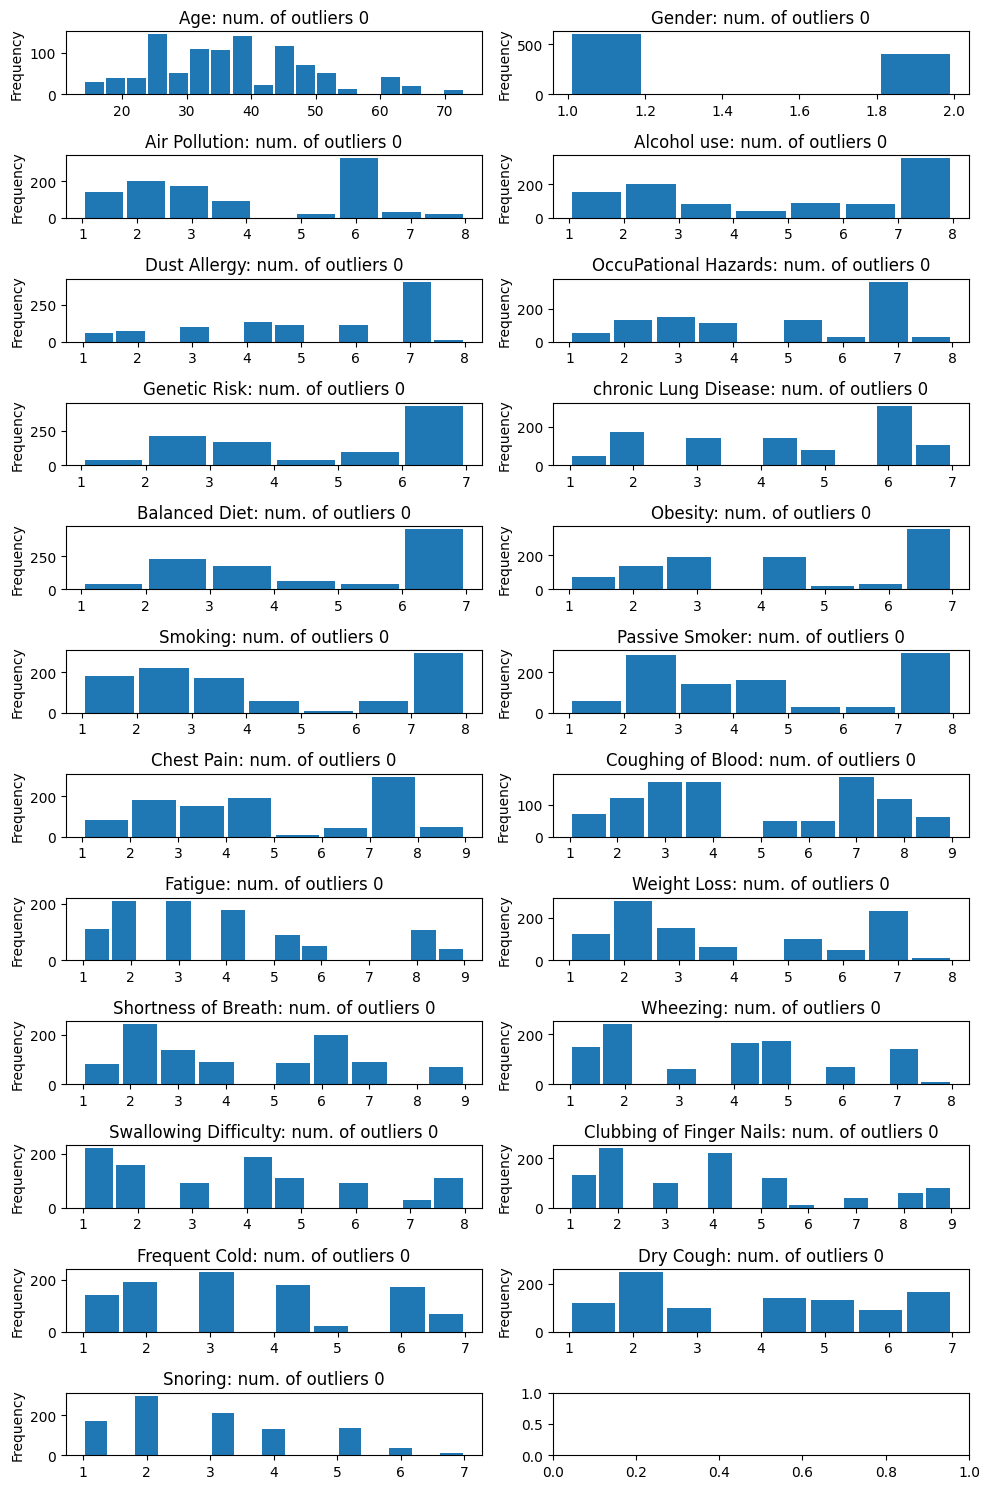

In [6]:
fig,ax = plt.subplots(12,2,figsize=(10,15))
ax = np.ravel(ax)

cols = list(df.columns)
cols.remove('Level')

for cnt,col in enumerate(cols):
    outliers = len(df[stats.zscore(df[col]) >= 3])
    df[col].plot(kind='hist',bins='fd',rwidth=0.9,title=f'{col}: num. of outliers {outliers}',ax=ax[cnt])

plt.tight_layout()
plt.show()


In [7]:
df.to_csv('./cleaned.csv',index=False)